In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Impor modul ML yang akan digunakan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier # Kita akan pakai Decision Tree Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Muat Dataset ---
# Ganti 'penguins.csv' dengan nama file yang Anda miliki jika berbeda
try:
    df = pd.read_csv('penguins.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("Error: File 'penguins.csv' tidak ditemukan. Pastikan file ada di direktori yang benar.")
    exit() # Hentikan jika file tidak ditemukan

print("\n--- 5 Baris Pertama Data ---")
print(df.head())

print("\n--- Informasi Kolom dan Missing Values ---")
print(df.info())

print("\n--- Statistik Deskriptif Kolom Numerik ---")
print(df.describe())

print("\n--- Jumlah Data Kosong per Kolom ---")
print(df.isnull().sum())

Dataset berhasil dimuat!

--- 5 Baris Pertama Data ---
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

--- Informasi Kolom dan Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-nu

In [44]:
# --- 2.1 Menangani Missing Values ---
# Kita akan menghapus baris yang memiliki nilai kosong.
# Untuk proyek awal, ini adalah cara yang paling sederhana.
# Untuk proyek yang lebih kompleks, Anda bisa mengisi nilai kosong (imputasi)
# menggunakan rata-rata, median, atau metode lainnya.
df.dropna(inplace=True)
print(f"\nJumlah baris setelah menghapus missing values: {len(df)}")
print(df.isnull().sum()) # Pastikan tidak ada lagi missing values

# --- 2.2 Memilih Fitur (X) dan Target (y) ---
# Fitur (X) adalah data yang akan kita gunakan untuk memprediksi.
# Target (y) adalah apa yang ingin kita prediksi.
# Kita akan menggunakan pengukuran tubuh dan 'Sex' untuk memprediksi 'Species'.

# Menyesuaikan nama kolom sesuai dengan data Anda
X = df[['culmen_length_mm', 'culmen_depth_mm', 'culmen_depth_mm', 'body_mass_g', 'sex']]
y = df['species']

print(f"\nShape X (fitur): {X.shape}")
print(f"Shape y (target): {y.shape}")

# --- 2.3 Mengubah Variabel Kategorikal Menjadi Numerik ---
# Kolom 'Species' (target) dan 'Sex' (fitur) adalah teks/kategorikal.
# Model ML membutuhkan input numerik.

# --- START PERUBAHAN DI SINI ---

# Menggunakan LabelEncoder untuk 'Species' (target)
le_species = LabelEncoder()
# LANGKAH KUNCI: Fit LabelEncoder pada SEMUA nilai unik dari kolom 'Species' di DataFrame asli
# Ini memastikan encoder 'tahu' semua kemungkinan spesies yang ada
all_unique_species = df['species'].unique()
le_species.fit(all_unique_species)

# Sekarang, transform target 'y' (yang mungkin subset dari df['Species'])
y_encoded = le_species.transform(y)
print(f"\nEncoding 'species': {list(le_species.classes_)} -> {list(range(len(le_species.classes_)))}")

# Menggunakan LabelEncoder untuk 'Sex' (fitur)
le_sex = LabelEncoder()
# Lakukan hal yang sama untuk 'Sex'
all_unique_sex = df['sex'].unique()
le_sex.fit(all_unique_sex)

X['sex_encoded'] = le_sex.transform(X['sex'])
# Hapus kolom 'Sex' asli karena sudah ada 'Sex_encoded'
X = X.drop('sex', axis=1)
print(f"Encoding 'sex': {list(le_sex.classes_)} -> {list(range(len(le_sex.classes_)))}")

# --- END PERUBAHAN DI SINI ---

print("\n--- 5 Baris Pertama Fitur (X) Setelah Encoding ---")
print(X.head())
print("\n--- 5 Baris Pertama Target (y) Setelah Encoding ---")
print(y_encoded[:5])

# --- 2.4 Membagi Data Latih dan Data Uji ---
# Ini adalah langkah kritis! Kita membagi dataset menjadi dua bagian:
# 1. Data Pelatihan (X_train, y_train): Untuk "mengajarkan" model.
# 2. Data Pengujian (X_test, y_test): Untuk "menguji" kinerja model pada data yang belum pernah dilihatnya.
# test_size=0.2 berarti 20% data akan digunakan untuk pengujian, 80% untuk pelatihan.
# random_state=42 memastikan hasil pembagian data selalu sama setiap kali kode dijalankan.
# stratify=y_encoded penting untuk klasifikasi multi-kelas, memastikan proporsi spesies
# di data latih dan uji tetap seimbang.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nUkuran Data Pelatihan (X_train): {len(X_train)} sampel")
print(f"Ukuran Data Pengujian (X_test): {len(X_test)} sampel")

# --- 2.5 Scaling Fitur Numerik ---
# Scaling (StandardScaler) membuat fitur-fitur numerik memiliki rata-rata nol dan variansi satu.
# Ini membantu beberapa algoritma ML bekerja lebih baik, terutama yang berbasis jarak.
# Decision Tree tidak terlalu sensitif terhadap scaling, tapi ini adalah praktik terbaik.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit_transform pada data pelatihan
X_test_scaled = scaler.transform(X_test)      # hanya transform pada data pengujian (jangan fit lagi!)

print("\n--- 5 Baris Pertama Data Pelatihan Setelah Scaling ---")
print(X_train_scaled[:5])


Jumlah baris setelah menghapus missing values: 334
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Shape X (fitur): (334, 5)
Shape y (target): (334,)

Encoding 'species': ['Adelie', 'Chinstrap', 'Gentoo'] -> [0, 1, 2]
Encoding 'sex': ['.', 'FEMALE', 'MALE'] -> [0, 1, 2]

--- 5 Baris Pertama Fitur (X) Setelah Encoding ---
   culmen_length_mm  culmen_depth_mm  culmen_depth_mm  body_mass_g  \
0              39.1             18.7             18.7       3750.0   
1              39.5             17.4             17.4       3800.0   
2              40.3             18.0             18.0       3250.0   
4              36.7             19.3             19.3       3450.0   
5              39.3             20.6             20.6       3650.0   

   sex_encoded  
0            2  
1            1  
2            1  
4            1  
5            2  

--- 5 Baris Pertama Targe

C:\Users\Hype\AppData\Local\Temp\ipykernel_3396\3753611163.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex_encoded'] = le_sex.transform(X['sex'])


In [45]:
# --- 3.1 Inisialisasi Model ---
# Kita gunakan Decision Tree Classifier.
# random_state=42 untuk memastikan hasil yang sama setiap kali dijalankan.
model = DecisionTreeClassifier(random_state=42)

print(f"\nModel yang dipilih: {model}")

# --- 3.2 Melatih Model ---
# Model akan "belajar" dari data pelatihan (X_train_scaled dan y_train)
print("\n--- Melatih Model ---")
model.fit(X_train_scaled, y_train)
print("Model berhasil dilatih!")


Model yang dipilih: DecisionTreeClassifier(random_state=42)

--- Melatih Model ---
Model berhasil dilatih!



--- Membuat Prediksi pada Data Pengujian ---

--- Hasil Evaluasi Model ---
Akurasi Model: 0.9701

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      0.93      0.93        14
      Gentoo       0.96      1.00      0.98        24

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67


Confusion Matrix:
[[28  1  0]
 [ 0 13  1]
 [ 0  0 24]]


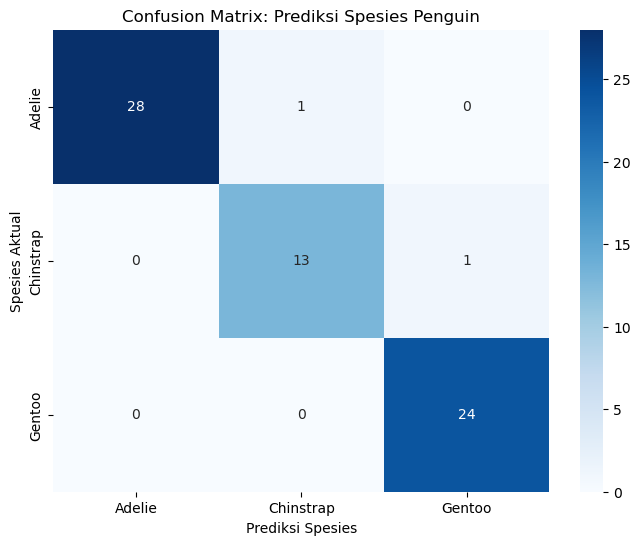

In [46]:
# --- 4.1 Membuat Prediksi pada Data Uji ---
# Gunakan model yang sudah dilatih untuk memprediksi spesies penguin pada data uji
print("\n--- Membuat Prediksi pada Data Pengujian ---")
y_pred = model.predict(X_test_scaled)

# --- 4.2 Mengevaluasi Kinerja Model ---
print("\n--- Hasil Evaluasi Model ---")

# Akurasi: Persentase prediksi yang benar
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}") # .4f untuk 4 angka di belakang koma

# Classification Report: Metrik lebih detail (Presisi, Recall, F1-Score)
# Inverse transform y_test dan y_pred untuk mendapatkan nama spesies asli
# agar laporan lebih mudah dibaca
target_names = le_species.classes_ # Ini akan langsung mengambil nama-nama spesies yang telah dipelajari encoder
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix: Tabel yang menunjukkan jumlah prediksi benar/salah per kelas
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# --- 4.3 Visualisasi Confusion Matrix ---
# Visualisasi akan membuat matriks kebingungan lebih mudah dipahami
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Prediksi Spesies')
plt.ylabel('Spesies Aktual')
plt.title('Confusion Matrix: Prediksi Spesies Penguin')
plt.show()

In [47]:
# --- 5.1 Contoh Prediksi untuk Penguin Baru ---
print("\n--- Contoh Prediksi untuk Penguin Baru ---")

# Bayangkan Anda menemukan penguin baru dan mengukur parameternya:
# Culmen Length (mm): 39.5
# Culmen Depth (mm): 17.5
# Flipper Length (mm): 190
# Body Mass (g): 3600
# Sex: FEMALE (yang akan di-encode menjadi 0 berdasarkan le_sex kita)

# Buat array NumPy dari data penguin baru.
# PASTIKAN URUTAN KOLOM SAMA dengan X_train saat melatih model:
# ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex_encoded']
new_penguin_data = np.array([[39.5, 17.5, 190.0, 3600.0, le_sex.transform(['FEMALE'])[0]]])

# --- 5.2 Scaling Data Baru ---
# SANGAT PENTING: Data baru juga harus di-scaling menggunakan scaler yang SAMA
# yang digunakan untuk data pelatihan (scaler).
new_penguin_data_scaled = scaler.transform(new_penguin_data)

# --- 5.3 Melakukan Prediksi ---
# Prediksi label (encoded)
predicted_species_encoded = model.predict(new_penguin_data_scaled)
# Ubah kembali label yang di-encode menjadi nama spesies asli
predicted_species_name = le_species.inverse_transform(predicted_species_encoded)

# Jika ingin melihat probabilitas prediksi untuk setiap kelas
prediction_probabilities = model.predict_proba(new_penguin_data_scaled)
predicted_probability = np.max(prediction_probabilities) * 100 # Probabilitas tertinggi

print(f"Data Penguin Baru (Fitur): {new_penguin_data[0]}")
print(f"Prediksi Spesies: {predicted_species_name[0]}")
print(f"Dengan Kepercayaan (Probabilitas Tertinggi): {predicted_probability:.2f}%")

# Coba contoh lain (misalnya, penguin yang mungkin Gentoo)
# Culmen Length (mm): 49.5
# Culmen Depth (mm): 16.0
# Flipper Length (mm): 220
# Body Mass (g): 5500
# Sex: MALE (encoded 1)
new_penguin_data_2 = np.array([[49.5, 16.0, 220.0, 5500.0, le_sex.transform(['MALE'])[0]]])
new_penguin_data_2_scaled = scaler.transform(new_penguin_data_2)
predicted_species_encoded_2 = model.predict(new_penguin_data_2_scaled)
predicted_species_name_2 = le_species.inverse_transform(predicted_species_encoded_2)
prediction_probabilities_2 = model.predict_proba(new_penguin_data_2_scaled)
predicted_probability_2 = np.max(prediction_probabilities_2) * 100

print(f"\nData Penguin Baru 2 (Fitur): {new_penguin_data_2[0]}")
print(f"Prediksi Spesies: {predicted_species_name_2[0]}")
print(f"Dengan Kepercayaan (Probabilitas Tertinggi): {predicted_probability_2:.2f}%")


--- Contoh Prediksi untuk Penguin Baru ---
Data Penguin Baru (Fitur): [3.95e+01 1.75e+01 1.90e+02 3.60e+03 1.00e+00]
Prediksi Spesies: Adelie
Dengan Kepercayaan (Probabilitas Tertinggi): 100.00%

Data Penguin Baru 2 (Fitur): [4.95e+01 1.60e+01 2.20e+02 5.50e+03 2.00e+00]
Prediksi Spesies: Gentoo
Dengan Kepercayaan (Probabilitas Tertinggi): 100.00%


c:\Users\Hype\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Hype\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

import joblib

# --- Simpan Model dan Objek Pra-pemrosesan ---
print("\n--- Menyimpan Model dan Objek Pra-pemrosesan ---")
joblib.dump(model, 'penguin_classifier_model.pkl')
joblib.dump(scaler, 'penguin_scaler.pkl')
joblib.dump(le_species, 'penguin_le_species.pkl')
joblib.dump(le_sex, 'penguin_le_sex.pkl')
print("Model, scaler, dan encoders berhasil disimpan!")


--- Menyimpan Model dan Objek Pra-pemrosesan ---
Model, scaler, dan encoders berhasil disimpan!
